# Visualize results

In [1]:
import csv
import json
import random
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
from tqdm import tqdm

/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
configs_db = pd.read_json('results/config.jsonl', lines=True).dropna()

In [3]:
configs_db

,vocab_size,seq_length,sparsity_index,nb_data,batch_size,nb_epochs,lambda_l1,lr,emb_dim,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id
1,2,12,5,2048,2048,1000,0.0001,0.010,2,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8
2,2,12,5,2048,2048,1000,0.0001,0.010,2,3,10,True,0,gelu,2.0,False,False,eab9a239d97e46d9b048d39ba818d926
3,2,12,5,2048,2048,1000,0.0000,0.001,2,3,10,True,0,gelu,7.0,False,False,12fb2d841e9248cdae117ccf5cffceb7
4,2,12,5,2048,2048,1000,0.0000,0.001,2,3,10,True,0,gelu,8.0,False,False,e15936dc73ca45b18e21a661443d9781
5,2,12,5,2048,32,1000,0.0001,0.001,2,3,10,True,0,gelu,2.0,False,False,5ff3c042ccbe4e46be11fb382a0fbfda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2,12,5,2048,32,1000,0.0001,0.010,2,3,10,True,0,gelu,8.0,False,False,b3c80d8219214000852c09a27c87c1ef
77,2,12,5,2048,32,1000,0.0001,0.010,2,3,10,True,0,gelu,4.0,False,False,cf228fa2c942463b9378a2bb58a64fef
78,2,12,5,2048,32,1000,0.0001,0.010,2,3,10,True,0,gelu,6.0,False,False,f31d1c7b954f48b99625ca7696b5c55b
79,2,12,5,2048,32,1000,0.0001,0.010,2,3,10,True,0,gelu,7.0,False,False,de6fe688715a45a19c4e123a456993d0


#### Debug

In [33]:
a = torch.stack([np.load('./results/0b6b72ff22594f91a8d7618816183eb2/accs.pkl', allow_pickle=True), np.load('./results/0b6b72ff22594f91a8d7618816183eb2/losses.pkl', allow_pickle=True)])

In [12]:
pd.DataFrame(a.T, columns=['acc', 'loss'])

,acc,loss
0,0.474121,0.994479
1,0.474121,0.971928
2,0.474121,0.951452
3,0.474121,0.932563
4,0.474121,0.914944
...,...,...
995,0.540039,0.688361
996,0.538574,0.688359
997,0.539062,0.688358
998,0.540039,0.688357


In [44]:
row = configs_db.iloc[0]
pd.DataFrame(
        torch.stack([
            np.load(f'./results/{row.id}/accs.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/losses.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/test_accs.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/test_losses.pkl', allow_pickle=True)
        ]).T,
        columns=['acc', 'loss', 'test_acc', 'test_loss'],
        index=np.arange(1, 1001)
    ).assign(**row.to_dict() | {'epoch': np.arange(1, 1001)}).reset_index()

,index,acc,loss,test_acc,test_loss,vocab_size,seq_length,sparsity_index,nb_data,batch_size,...,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id,epoch
0,1,0.304199,1.121874,0.283203,1.128062,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,1
1,2,0.437988,1.076825,0.414062,1.084278,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,2
2,3,0.498047,1.041459,0.485840,1.049656,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,3
3,4,0.509277,1.014917,0.499023,1.023722,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,4
4,5,0.509277,0.995406,0.499023,1.005054,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.529297,0.691170,0.509766,0.694712,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,996
996,997,0.529297,0.691169,0.509766,0.694711,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,997
997,998,0.529297,0.691168,0.509766,0.694711,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,998
998,999,0.529297,0.691167,0.508789,0.694710,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,999


#### Plain

In [4]:
data = pd.concat([
    pd.DataFrame(
        torch.stack([
            np.load(f'./results/{row.id}/accs.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/losses.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/test_accs.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/test_losses.pkl', allow_pickle=True)
        ]).T,
        columns=['acc', 'loss', 'test_acc', 'test_loss']
    ).assign(**row._asdict() | {'epoch': np.arange(1, 1001)})
    for row in tqdm(configs_db.itertuples(), total=len(configs_db)) if Path(f'./results/{row.id}').exists()
    # and (row.model_seed in subset_exp)
]).reset_index(drop=True)

100%|██████████| 80/80 [00:00<00:00, 203.75it/s]


In [5]:
data

,acc,loss,test_acc,test_loss,Index,vocab_size,seq_length,sparsity_index,nb_data,batch_size,...,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id,epoch
0,0.304199,1.121874,0.283203,1.128062,1,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,1
1,0.437988,1.076825,0.414062,1.084278,1,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,2
2,0.498047,1.041459,0.485840,1.049656,1,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,3
3,0.509277,1.014917,0.499023,1.023722,1,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,4
4,0.509277,0.995406,0.499023,1.005054,1,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.531250,0.690343,0.512207,0.693067,80,2,12,5,2048,32,...,3,10,True,0,gelu,9.0,False,False,612214f0706a43e8b6daef6cea6a29bd,996
79996,0.538086,0.690299,0.525391,0.692798,80,2,12,5,2048,32,...,3,10,True,0,gelu,9.0,False,False,612214f0706a43e8b6daef6cea6a29bd,997
79997,0.537109,0.690301,0.524414,0.693037,80,2,12,5,2048,32,...,3,10,True,0,gelu,9.0,False,False,612214f0706a43e8b6daef6cea6a29bd,998
79998,0.538574,0.690301,0.520508,0.692620,80,2,12,5,2048,32,...,3,10,True,0,gelu,9.0,False,False,612214f0706a43e8b6daef6cea6a29bd,999


In [17]:
data.columns

Index(['acc', 'loss', 'test_acc', 'test_loss', 'Index', 'vocab_size',
       'seq_length', 'sparsity_index', 'nb_data', 'batch_size', 'nb_epochs',
       'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias',
       'ffn_dropout', 'activation', 'seed', 'save_weights', 'interactive',
       'id', 'epoch'],
      dtype='object')

batch_size  nb_epochs  lambda_l1  lr     emb_dim  nb_emb  ffn_dim  ffn_bias  ffn_dropout  activation
32          1000       0.0000     0.001  2        3       10       True      0            gelu          [Axes(0.125,0.53;0.775x0.35), Axes(0.125,0.11;...
                                  0.010  2        3       10       True      0            gelu          [Axes(0.125,0.53;0.775x0.35), Axes(0.125,0.11;...
                       0.0001     0.001  2        3       10       True      0            gelu          [Axes(0.125,0.53;0.775x0.35), Axes(0.125,0.11;...
                                  0.010  2        3       10       True      0            gelu          [Axes(0.125,0.53;0.775x0.35), Axes(0.125,0.11;...
2048        1000       0.0000     0.001  2        3       10       True      0            gelu          [Axes(0.125,0.53;0.775x0.35), Axes(0.125,0.11;...
                                  0.010  2        3       10       True      0            gelu          [Axes(0.125,0.53;0.775x0.

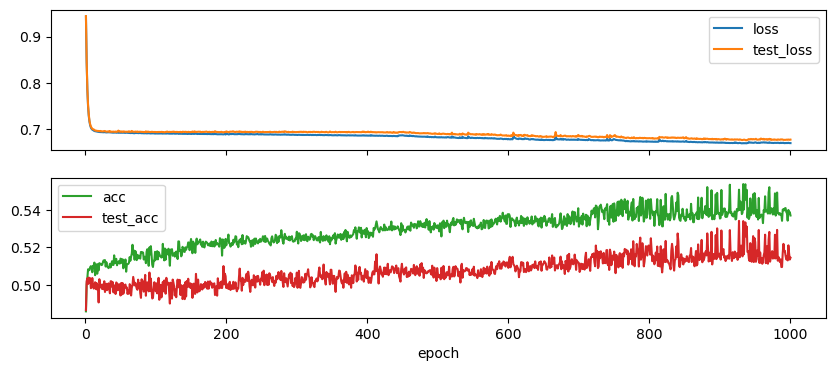

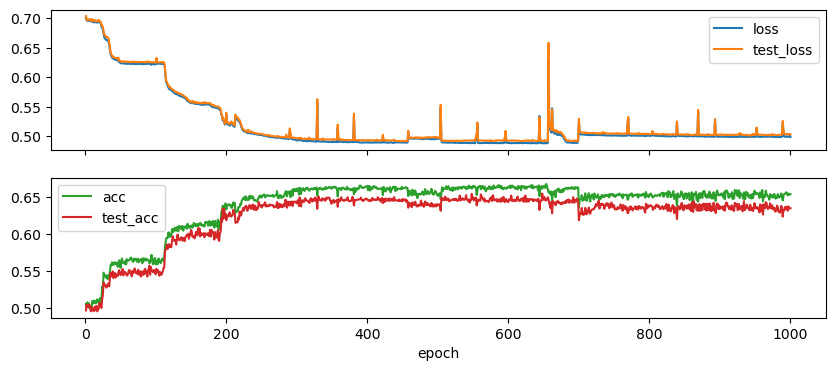

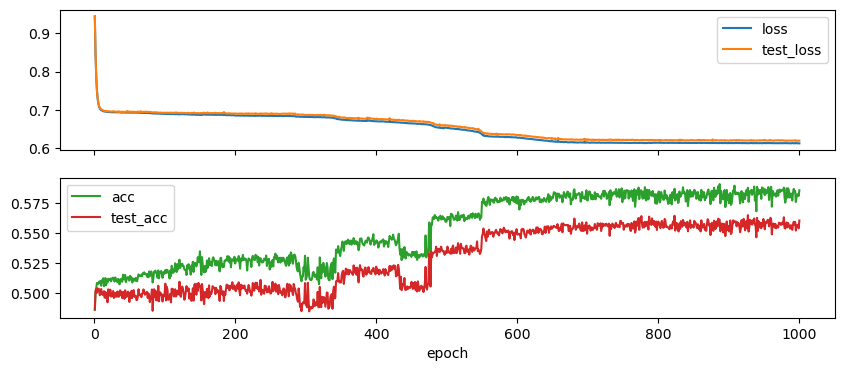

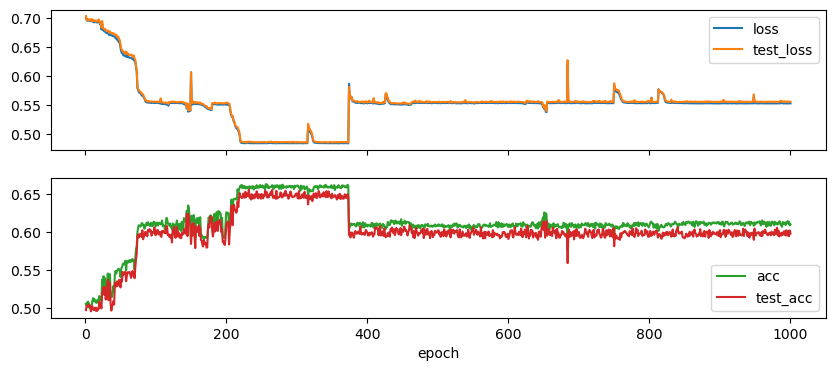

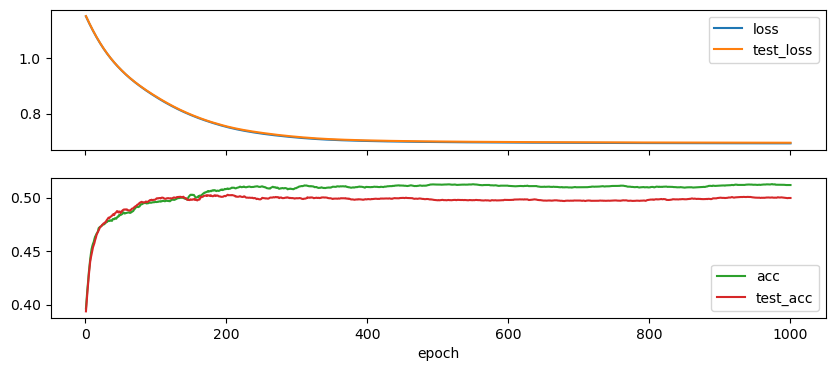

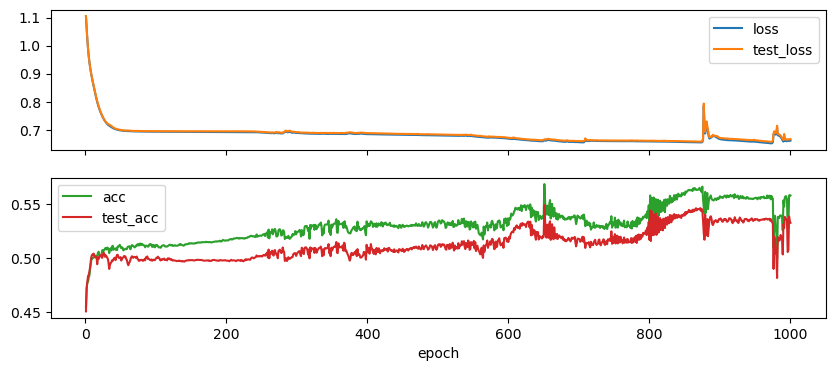

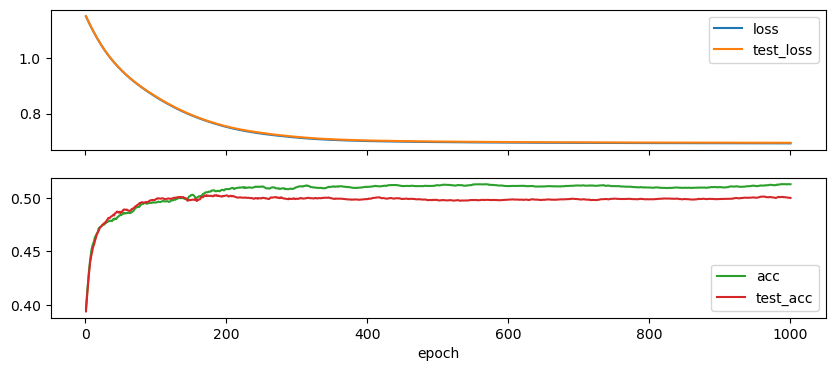

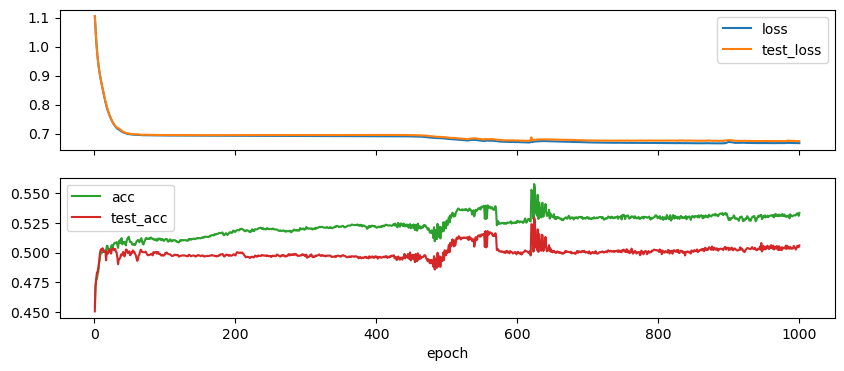

In [29]:
# data.groupby(['id']).plot(x='epoch', y=['loss', 'test_loss', 'acc', 'test_acc'], legend=True, subplots=[('loss', 'test_loss'), ('acc', 'test_acc')], figsize=(10, 4))
data.drop(columns=['id']).groupby(['batch_size', 'nb_epochs', 'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias', 'ffn_dropout', 'activation', 'epoch']).mean().reset_index().groupby(['batch_size', 'nb_epochs', 'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias', 'ffn_dropout', 'activation']).plot(x='epoch', y=['loss', 'test_loss', 'acc', 'test_acc'], legend=True, subplots=[('loss', 'test_loss'), ('acc', 'test_acc')], figsize=(10, 4))

## Mk1

In [61]:
EXP_DIR = Path('./results/Mk1')
configs_db = pd.read_json(EXP_DIR / 'config.jsonl', lines=True).dropna()

In [62]:
configs_db

,vocab_size,seq_length,sparsity_index,nb_data,batch_size,nb_epochs,lambda_l1,lr,emb_dim,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id
0,2,12,5,2048,2048,1000,0.0001,0.010,2,3,10,True,0,gelu,0,False,False,03873fe04f494b8a860d55d183283c4e
1,2,12,5,2048,2048,1000,0.0001,0.010,2,3,10,True,0,gelu,9,False,False,77bcaf3f2851426bb7114d3898583398
2,2,12,5,2048,2048,1000,0.0001,0.010,2,3,10,True,0,gelu,8,False,False,905248265da84ec9a60be80a6924b42b
3,2,12,5,2048,2048,1000,0.0001,0.010,2,3,32,True,0,gelu,5,False,False,8cf7dd39f2b747398aca730c4cb0cca3
4,2,12,5,2048,2048,1000,0.0001,0.010,2,3,32,True,0,gelu,6,False,False,bfc3b0c5e3ca4d16885b4ef30d9bdfb8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2,12,5,2048,2048,1000,0.0001,0.001,2,3,32,True,0,gelu,7,False,False,2f7d851aadcb4c9cbf69ef65a317c67d
100,2,12,5,2048,2048,1000,0.0000,0.010,2,3,512,True,0,gelu,4,False,False,30818ca47ce844c8905feb43132c3cbb
101,2,12,5,2048,2048,1000,0.0000,0.010,2,3,512,True,0,gelu,3,False,False,dc925b11d47645e2abeb85856f67219c
102,2,12,5,2048,2048,1000,0.0000,0.010,2,3,512,True,0,gelu,2,False,False,929493d01d72482ea99424fcb963a475


#### Debug

In [ ]:
a = torch.stack([np.load('./results/0b6b72ff22594f91a8d7618816183eb2/accs.pkl', allow_pickle=True), np.load('./results/0b6b72ff22594f91a8d7618816183eb2/losses.pkl', allow_pickle=True)])

In [ ]:
pd.DataFrame(a.T, columns=['acc', 'loss'])

,acc,loss
0,0.474121,0.994479
1,0.474121,0.971928
2,0.474121,0.951452
3,0.474121,0.932563
4,0.474121,0.914944
...,...,...
995,0.540039,0.688361
996,0.538574,0.688359
997,0.539062,0.688358
998,0.540039,0.688357


In [ ]:
row = configs_db.iloc[0]
pd.DataFrame(
        torch.stack([
            np.load(f'./results/{row.id}/accs.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/losses.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/test_accs.pkl', allow_pickle=True),
            np.load(f'./results/{row.id}/test_losses.pkl', allow_pickle=True)
        ]).T,
        columns=['acc', 'loss', 'test_acc', 'test_loss'],
        index=np.arange(1, 1001)
    ).assign(**row.to_dict() | {'epoch': np.arange(1, 1001)}).reset_index()

,index,acc,loss,test_acc,test_loss,vocab_size,seq_length,sparsity_index,nb_data,batch_size,...,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id,epoch
0,1,0.304199,1.121874,0.283203,1.128062,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,1
1,2,0.437988,1.076825,0.414062,1.084278,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,2
2,3,0.498047,1.041459,0.485840,1.049656,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,3
3,4,0.509277,1.014917,0.499023,1.023722,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,4
4,5,0.509277,0.995406,0.499023,1.005054,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.529297,0.691170,0.509766,0.694712,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,996
996,997,0.529297,0.691169,0.509766,0.694711,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,997
997,998,0.529297,0.691168,0.509766,0.694711,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,998
998,999,0.529297,0.691167,0.508789,0.694710,2,12,5,2048,2048,...,3,10,True,0,gelu,3.0,False,False,7744ad6e285c4ffbb41126939660baf8,999


#### Plain

In [63]:
data = pd.concat([
    pd.DataFrame(
        torch.stack([
            np.load(EXP_DIR / f'{row.id}/accs.pkl', allow_pickle=True),
            np.load(EXP_DIR / f'{row.id}/losses.pkl', allow_pickle=True),
            np.load(EXP_DIR / f'{row.id}/test_accs.pkl', allow_pickle=True),
            np.load(EXP_DIR / f'{row.id}/test_losses.pkl', allow_pickle=True)
        ]).T,
        columns=['acc', 'loss', 'test_acc', 'test_loss']
    ).assign(**row._asdict() | {'epoch': np.arange(1, 1001)})
    for row in tqdm(configs_db.itertuples(), total=len(configs_db)) if Path(EXP_DIR / f'{row.id}').exists()
    # and (row.model_seed in subset_exp)
]).reset_index(drop=True)

100%|██████████| 104/104 [00:00<00:00, 144.18it/s]


In [64]:
data

,acc,loss,test_acc,test_loss,Index,vocab_size,seq_length,sparsity_index,nb_data,batch_size,...,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_weights,interactive,id,epoch
0,0.477539,1.105971,0.492676,1.101292,1,2,12,5,2048,2048,...,3,10,True,0,gelu,9,False,False,77bcaf3f2851426bb7114d3898583398,1
1,0.486816,1.052654,0.502930,1.049206,1,2,12,5,2048,2048,...,3,10,True,0,gelu,9,False,False,77bcaf3f2851426bb7114d3898583398,2
2,0.488281,1.003372,0.509766,1.001195,1,2,12,5,2048,2048,...,3,10,True,0,gelu,9,False,False,77bcaf3f2851426bb7114d3898583398,3
3,0.483398,0.958723,0.496094,0.957844,1,2,12,5,2048,2048,...,3,10,True,0,gelu,9,False,False,77bcaf3f2851426bb7114d3898583398,4
4,0.506836,0.919133,0.494629,0.919557,1,2,12,5,2048,2048,...,3,10,True,0,gelu,9,False,False,77bcaf3f2851426bb7114d3898583398,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101995,0.525391,0.686100,0.490234,0.700608,102,2,12,5,2048,2048,...,3,512,True,0,gelu,2,False,False,929493d01d72482ea99424fcb963a475,996
101996,0.530273,0.684733,0.496582,0.701412,102,2,12,5,2048,2048,...,3,512,True,0,gelu,2,False,False,929493d01d72482ea99424fcb963a475,997
101997,0.528809,0.684552,0.505859,0.702046,102,2,12,5,2048,2048,...,3,512,True,0,gelu,2,False,False,929493d01d72482ea99424fcb963a475,998
101998,0.527832,0.684268,0.496582,0.702250,102,2,12,5,2048,2048,...,3,512,True,0,gelu,2,False,False,929493d01d72482ea99424fcb963a475,999


In [65]:
data.columns

Index(['acc', 'loss', 'test_acc', 'test_loss', 'Index', 'vocab_size',
       'seq_length', 'sparsity_index', 'nb_data', 'batch_size', 'nb_epochs',
       'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias',
       'ffn_dropout', 'activation', 'seed', 'save_weights', 'interactive',
       'id', 'epoch'],
      dtype='object')

/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/private/home/wesbz/.conda/envs/poison-brew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


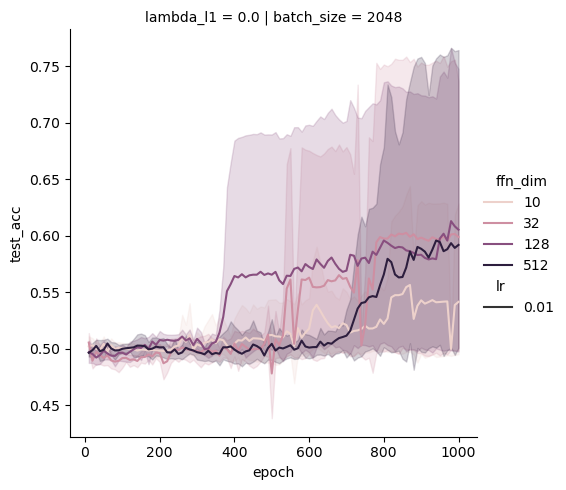

In [66]:
# data.groupby(['id']).plot(x='epoch', y=['loss', 'test_loss', 'acc', 'test_acc'], legend=True, subplots=[('loss', 'test_loss'), ('acc', 'test_acc')], figsize=(10, 4))
# data.drop(columns=['id']).groupby(['batch_size', 'nb_epochs', 'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias', 'ffn_dropout', 'activation', 'epoch']).mean().reset_index().groupby(['batch_size', 'nb_epochs', 'lambda_l1', 'lr', 'emb_dim', 'nb_emb', 'ffn_dim', 'ffn_bias', 'ffn_dropout', 'activation']).plot(x='epoch', y=['loss', 'test_loss', 'acc', 'test_acc'], legend=True, subplots=[('loss', 'test_loss'), ('acc', 'test_acc')], figsize=(10, 4))
# for group in data.groupby(['id']):
#     plt.figure()
#     sns.lineplot(x='epoch', y='test_acc', data=group[1], label=group[0])

condition = 'epoch % 10 == 0 and lambda_l1 == 0.0'

sns.relplot(x='epoch', y='test_acc', data=data.query(condition), kind='line', hue='ffn_dim', hue_norm=mpl.colors.LogNorm(), style='lr', col='batch_size', row='lambda_l1')